In [45]:
import pandas as pd 
import numpy  as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set_style("whitegrid")

## Importando dados 

In [2]:
data = pd.read_csv('../data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

## Verificando tipo dos dados 

In [6]:
dict_desc = {
    'type' : data.dtypes , 
    'qtd_null': data.isnull().sum() , 
    'pct_null': data.isnull().mean()
}
pd.DataFrame.from_dict(dict_desc)

,type,qtd_null,pct_null
customerID,object,0,0.0
gender,object,0,0.0
SeniorCitizen,int64,0,0.0
Partner,object,0,0.0
Dependents,object,0,0.0
tenure,int64,0,0.0
PhoneService,object,0,0.0
MultipleLines,object,0,0.0
InternetService,object,0,0.0
OnlineSecurity,object,0,0.0


- Os dados não apresentam valores faltantes 

- A grande parte das variáveis são categóricas

- A variável **total charges** está no format object quando deveria ser numérica, será necessário converte-la

In [32]:
data["TotalCharges"].replace(" ",0,inplace = True)
data["TotalCharges"] = data["TotalCharges"].astype(float)

## Selecionando variáveis de acordo com seu tipo

In [33]:
list_numeric = data.select_dtypes(['float','int']).columns
list_categorical = data.drop('customerID',axis=1).select_dtypes(['object']).columns

In [34]:
data['TotalCharges']

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

Nesse caso é possível selecionar as variáveis dessa maneira, uma vez que não temos variáveis categóricas representadas por valores numéricos, por exemplo:
    - Sexo: 1 se Feminino, 0 se Masculino
    
Caso isso ocorra, é provavel que a seleção dessas variáveis ocorra de forma manual

In [49]:
def plot_categorical(df,vars_to_eda): 
    for i in df[vars_to_eda].select_dtypes('object'):
        ax = plt.figure(figsize=(14,4))
    
        plt.subplot(1,2,1)
        ax = df[i].value_counts(normalize = False).\
         to_frame('quantity').\
         reset_index().\
         rename(columns = {'index':i}).\
         plot(x = i,y = 'quantity' , kind = 'bar',ax = plt.gca(),color = 'navy')
        plt.title('Quantity - '+ str(i),fontsize = 16)
        plt.xlabel(i)
        plt.ylabel('Quantity')
        plt.legend('')
        plt.xticks(fontsize = 14)
        plt.yticks(fontsize = 14)


        plt.subplot(122)
        ax = df[i].value_counts(normalize = True).\
             to_frame('pct').\
             reset_index().\
             rename(columns = {'index':i}).\
             plot(x = i,y = 'pct' , kind = 'bar',ax = plt.gca(),color = 'navy')
        plt.title('Pct - ' + str(i) ,fontsize = 16)
        plt.xlabel(i)
        plt.ylabel('%')
        plt.legend('')
        plt.xticks(fontsize = 14)
        plt.yticks(fontsize = 14)



        plt.tight_layout()
    
    
        plt.show(ax)
    

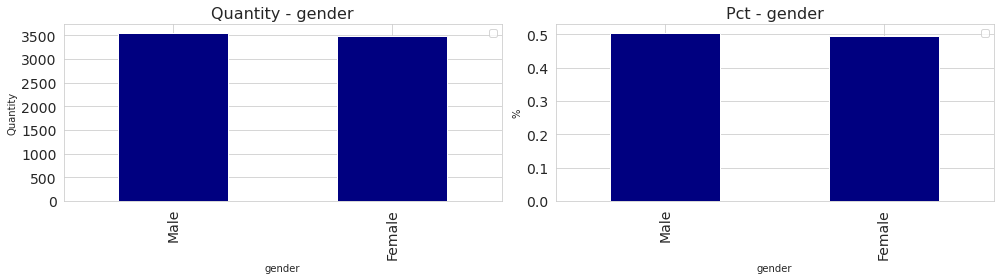

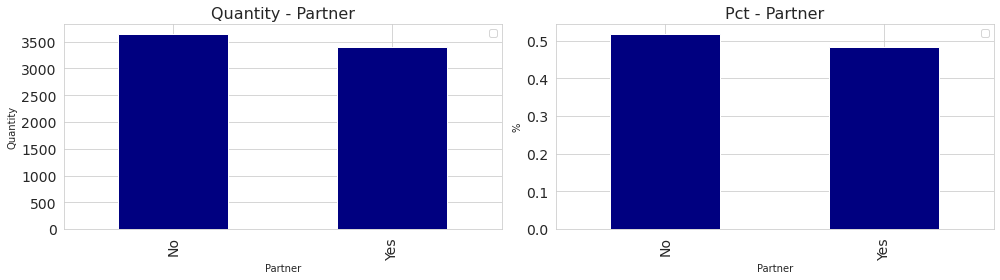

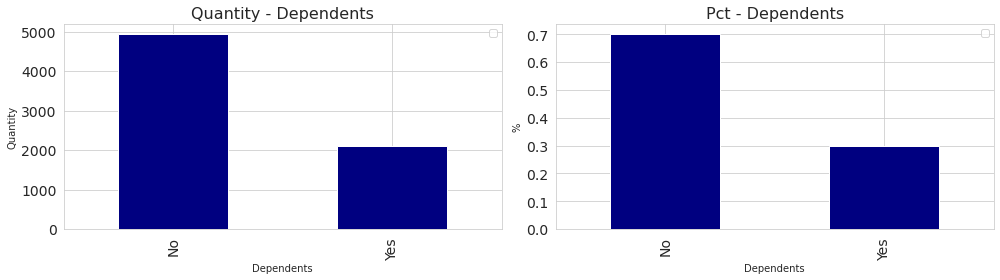

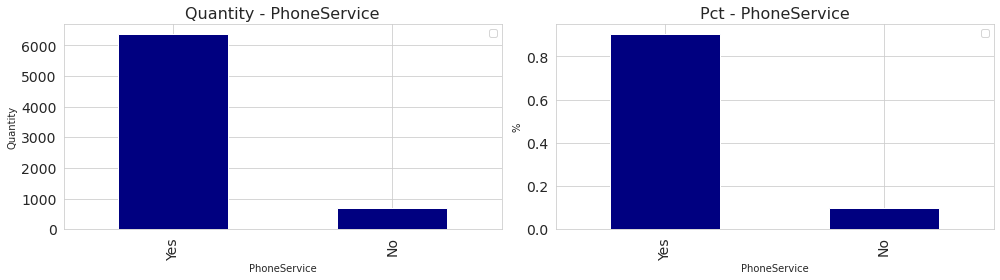

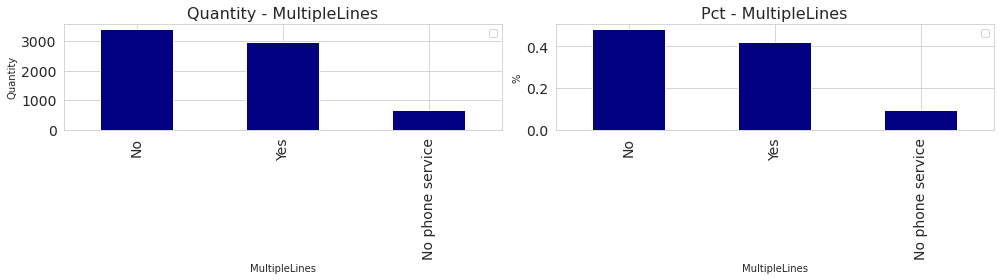

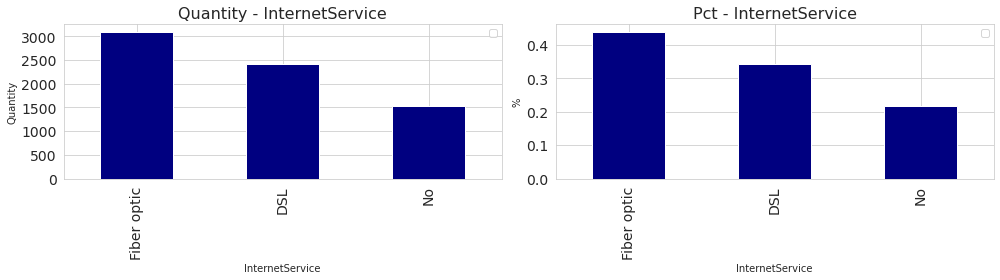

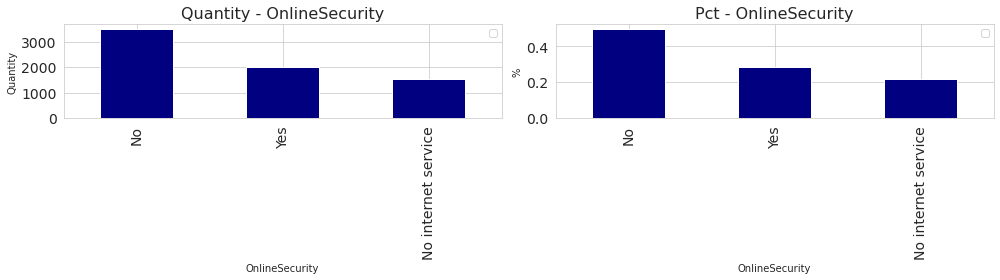

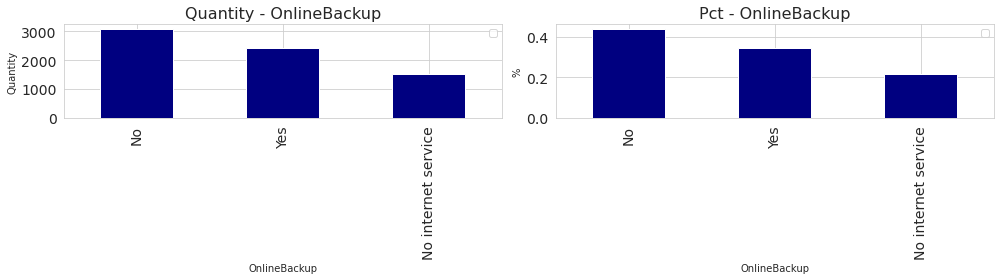

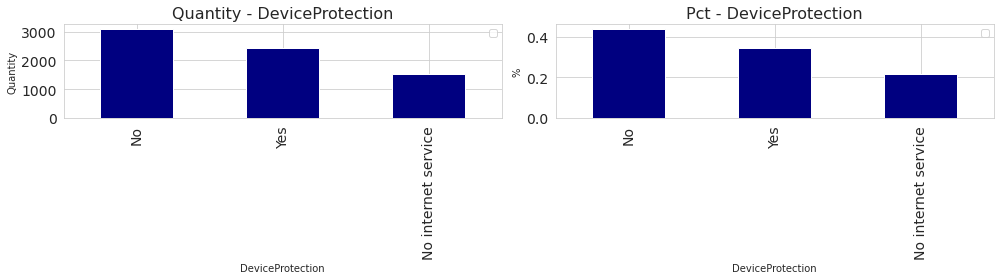

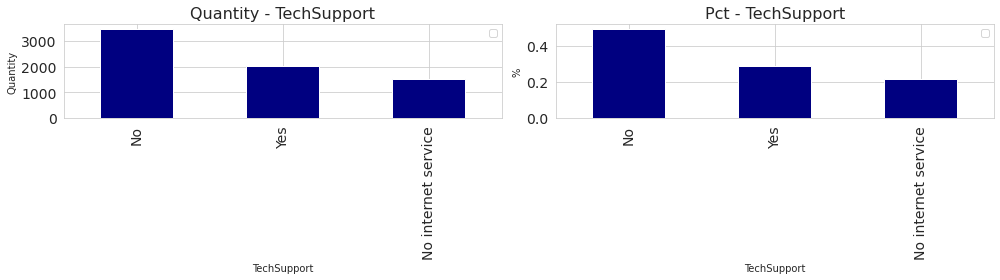

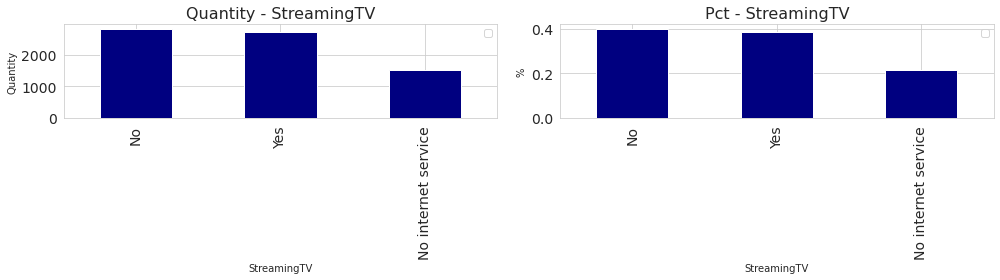

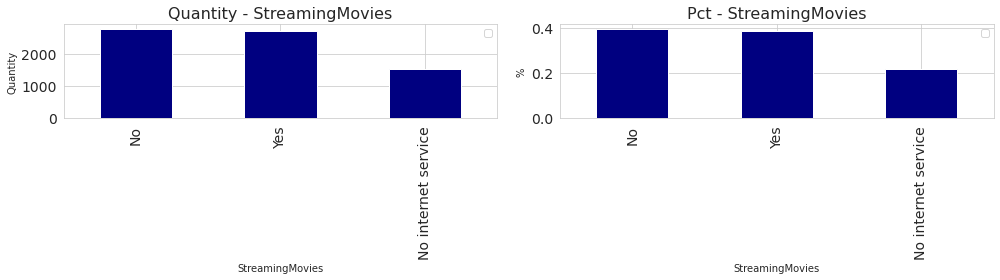

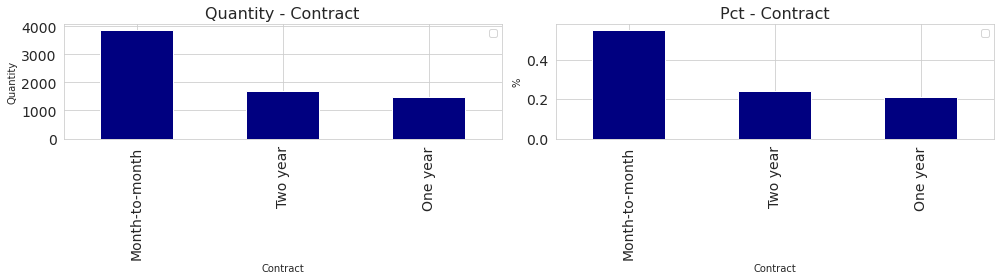

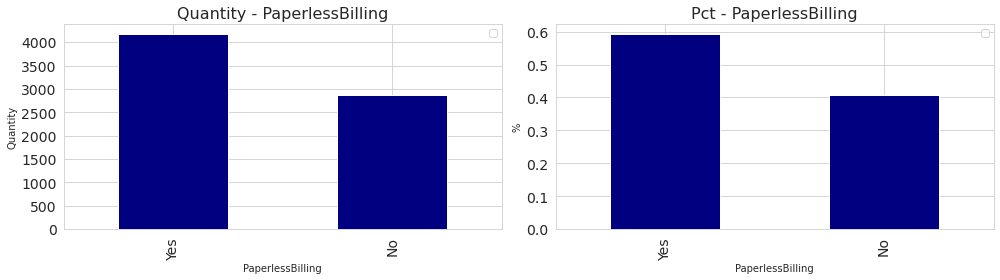

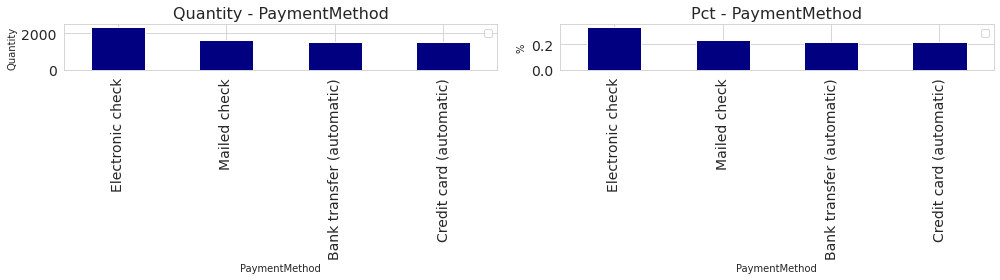

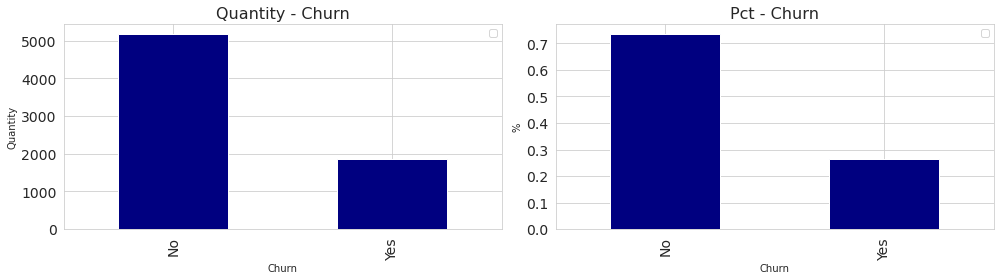

In [50]:
plot_categorical(data,list_categorical)

In [53]:
data.Churn.value_counts(normalize=  True)

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64